In [5]:
import pandas as pd
df = pd.read_csv("/Users/renchulaji/Desktop/Data Science/Wine_clust.csv")

In [6]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [9]:
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [11]:
inertia = []
k_range = range(1, 11)

In [12]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

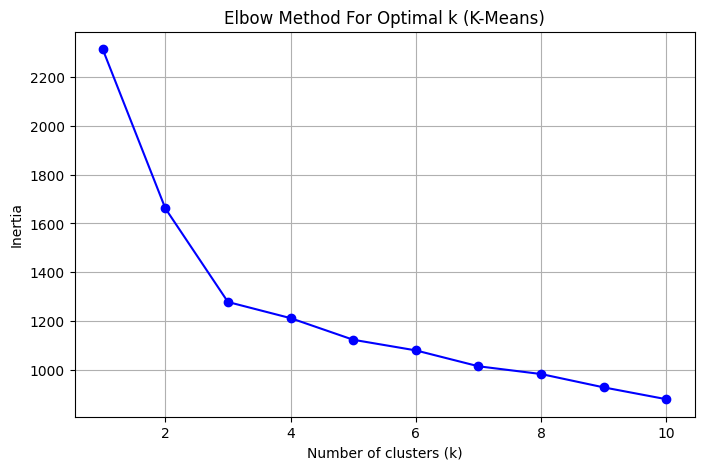

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k (K-Means)')
plt.grid(True)
plt.show()

In [14]:
from sklearn.decomposition import PCA

In [15]:
kmeans_final = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans_final.fit_predict(scaled_df)

In [16]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

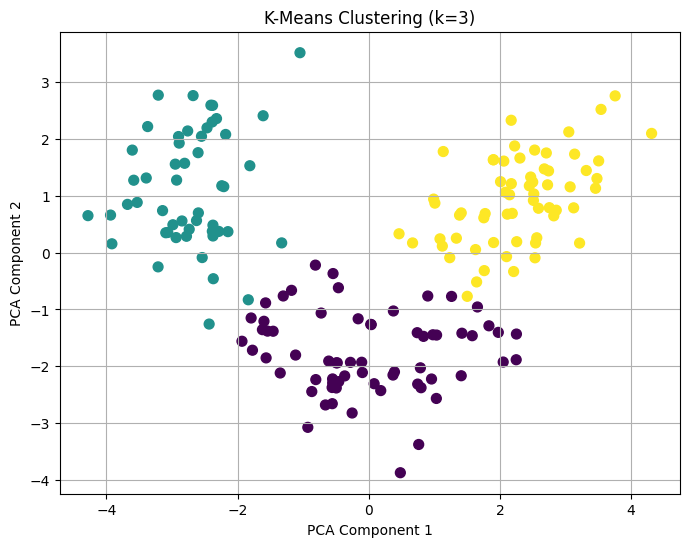

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering (k=3)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

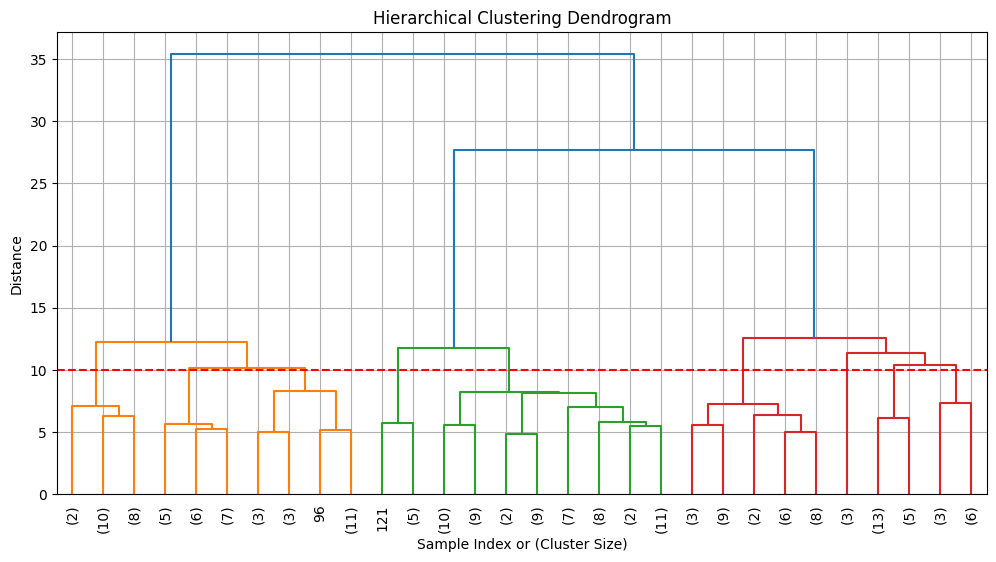

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(scaled_df, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.axhline(y=10, color='r', linestyle='--')  # Cut-off threshold line
plt.grid(True)
plt.show()

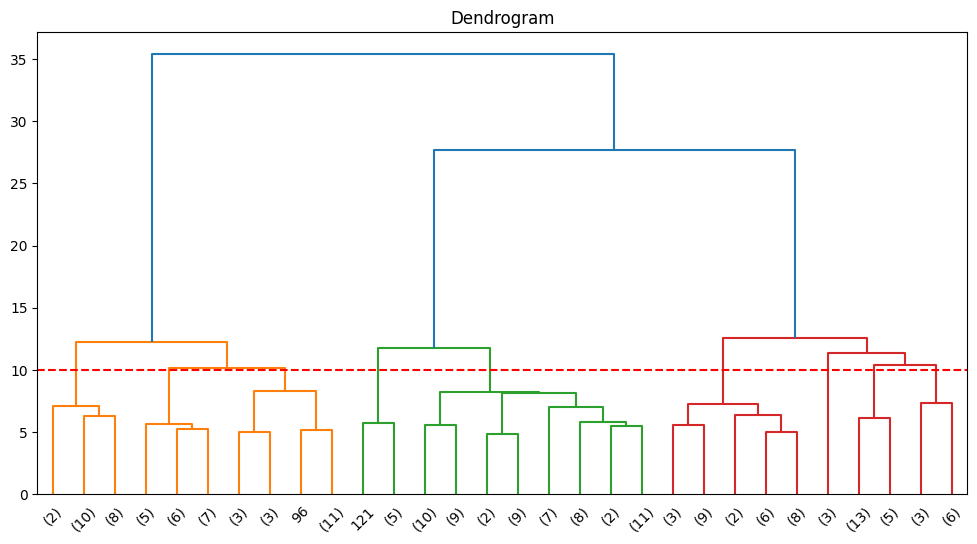

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(scaled_df, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.axhline(y=10, color='r', linestyle='--')  # Adjust the y value as needed
plt.title("Dendrogram")
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=3)  
labels = agglo.fit_predict(scaled_df)

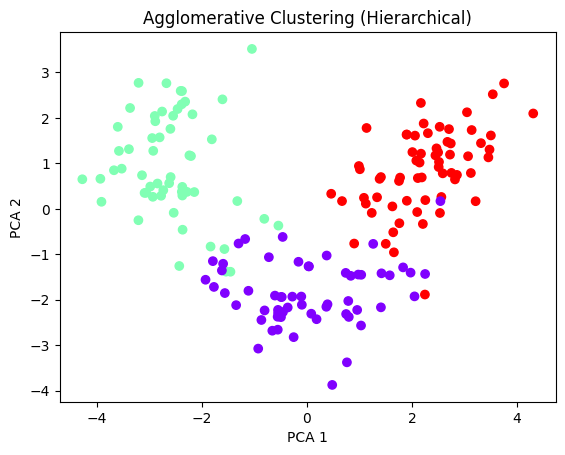

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='rainbow')
plt.title("Agglomerative Clustering (Hierarchical)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

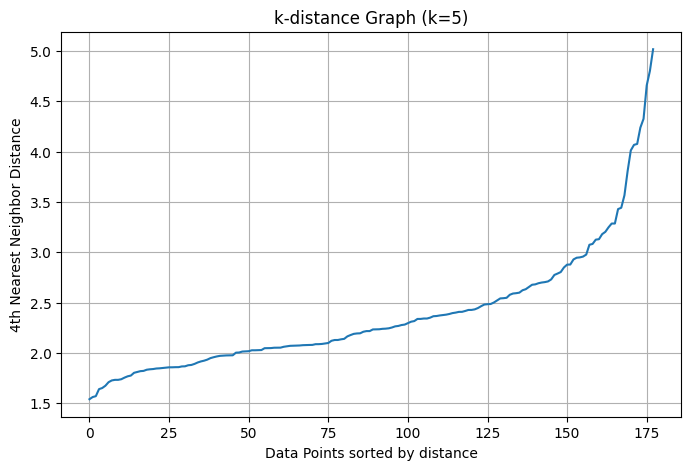

In [22]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(scaled_df)
distances, indices = nbrs.kneighbors(scaled_df)

distances = np.sort(distances[:, 4])
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('k-distance Graph (k=5)')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.grid(True)
plt.show()

In [23]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1.5, min_samples=5)
db_labels = db.fit_predict(scaled_df)

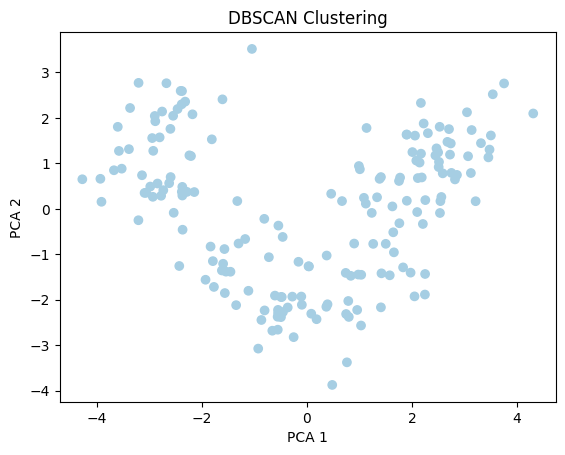

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
db_pca = pca.fit_transform(scaled_df)

plt.scatter(db_pca[:, 0], db_pca[:, 1], c=db_labels, cmap='Paired')
plt.title("DBSCAN Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()